# Recurrent Neural Networks (RNNs)

## Variable Length Sequences of Words

Processing an image forces it into a specific input dimension, and we can use convolutions to identify nearby pixels.

- This may not be obvious in regards to text, i.e. what kind of data we want to input on, what kind of operations we want to use (e.g. Twitter sentiment analysis, tweets have a variable number of words)


- How to account for the variable length of the sequences of words?


- Naive way is using the *bag of words* implementation i.e. look at how many times a word appears in a text


- Ideally, each word is processed or understood in the appropriate context, however, we need some notion of what *context* is (prior words surrounding it, prior sentences etc.)


- Words should be handled differently depending on the *context*


- Each word should **update the context**

## Notion of Recurrence

This is where we input the words into our network one by one


- This way we can handle variable lengths of text by just continuing to feed until the end of a sentence or document


- Given we have information from prior words, the responde to a word depends on the words that preceded it 


The network would then output two things as each word came in:

**1. Prediction:** what would be the prediction if the sequence ended with that word


**2. State:** summary of everything that happened in the past (the context leading up to that point)

<div>
    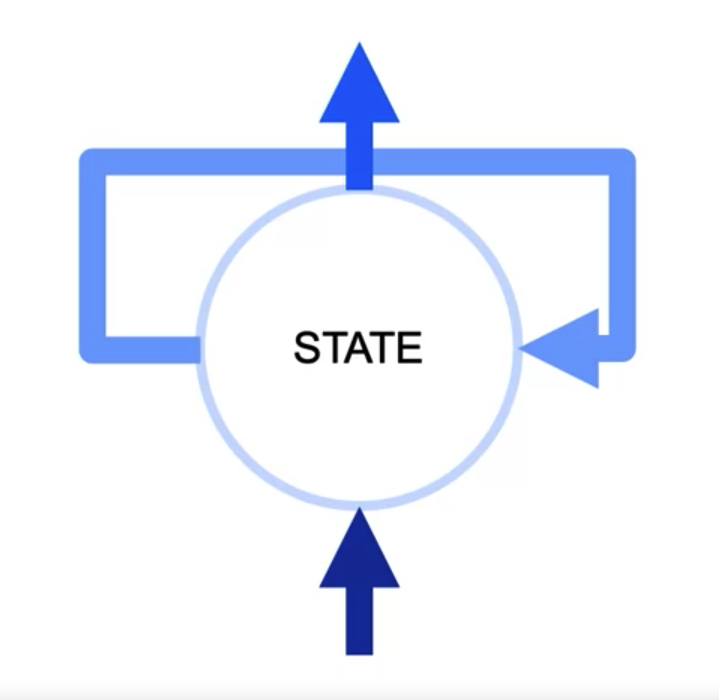
</div>

The input will:

- Come in the network one word/step at a time 


- as the values come in we can udpate the state with all past contexts


- we can keep track of the inputs that come in


- as well as output a value so that we can have a prediction at each step 

## Unrolling the RNN

<div>
    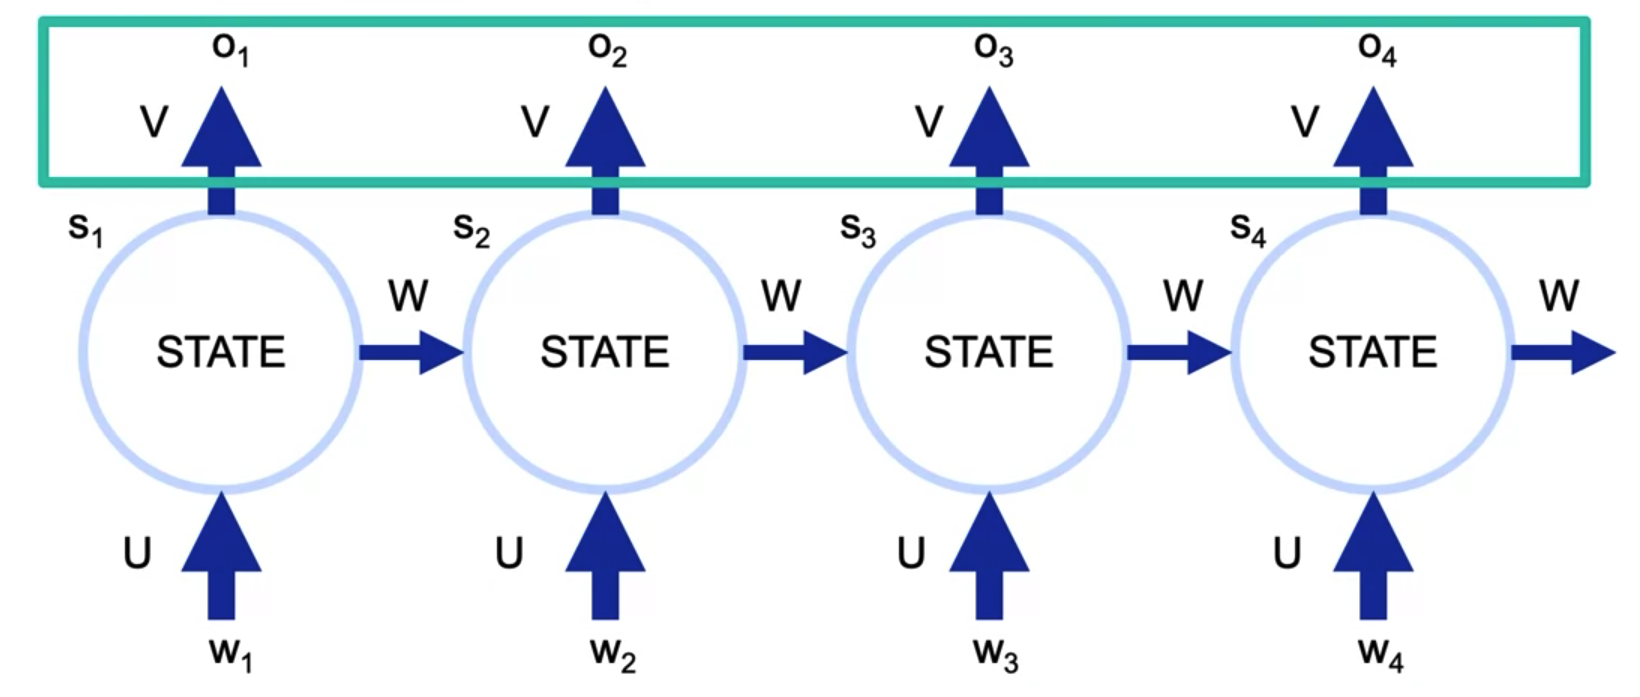
</div>

- **1. Information Vector - $w_i$:** are the words/steps coming in one at a time, (or any information at one point in time, vector of information for each time period), then starting at the first step we have a 




- **2. Linear Transformation $U$:** linear transformation (matrix U) which will be some vector representing that single word (or any information at one point in time)




- **3. State $s_i$:** At each step, along with our input dot product of $w_i$ and U, we are going to get as input the state from the prior cells, which is a way of storing and passing the information from one cell to the next. 
    - Initialize the state with a zero vector and then pass the info from $s_1$ to $s_2$ etc.

Passing the state is done by adding together the values from the prior state and taking the dot product of that state with the matrix $W$

Then we combine the values from the input $w_1$ and $U$ as well as $s_1$ adn $W$ and pass that all together through an **activation function** to get our new state.

**Output from this activation:** can be used as output at each step and have another transformation matrix $V$ and pass it again to the final output $o_i$

**Kernel:** are the inputs that are initialized

## Mathematical Definitions

$w_i$ is the word at position $i$



$s_i$ is the state at position $i$



$o_i$ is the output at position $i$


In order to calculate the state, we take a function of the linear combination of our input, add it on to a linear combination of our prior state, and that function should be some **non-linear activation function**

$$ \text{Core RNN: } s_i = f(Uw_i + Ws_{i-1}) $$

For our output, we take a linear combination of our current state and pass that through the activation function (classes in this case would be softmax)

$$ \text{Subsequent Dense Layer: } o_i = \text{softmax}(V s_i) $$

### In Pseudocode


- `current_state = function(old_state, current_input)`


- `current_output = function2(current_state)`

Therefore we learn function 1 and function 2 by training our network, so what are going to be the different weights that we need in order to get that current state?

$r$ is going to be the dimension of our input vector


$s$ is the dimension of the hidden state


$t$ is the dimension of the output vector (after the dense layer)

- In order to get the transformations that we need: 

$U$ is a $s \times r$ matrix


$W$ is a $s \times s$ matrix (will take the prior state of dimension s and keep it so it will still be an s vector


$V$ is a $t \times r$ matrix and it will transform our vector s from that hidden state into something that is of size t or t vector that fits the dimensions of our output



**N.B.** the weight matrices are going to be the same across all positions


We will often train on just the **final** output and ignore intermediate outputs

### Trainig RNNs

There is going to be a slight variation to the Backpropagation called the **Backpropagation Through Time (BPTT)** that allows us to update the weights within our RNN 


- RNNs are sensitive to the length of a sequence due to the vanishing/exploding gradient problem


- in practice set a max length to our sequences

    - if input is **shorter** than max: we *pad it*
    
    - if input is **longer** than max: we *truncate it*


## Weaknesses of RNNs

The nature of state transition means it is hard to keep information from distant past in current memory without reinforcement

## Using RNNs to classify sentiment on IMDB data
For this exercise, we will train a "vanilla" RNN to predict the sentiment on IMDB reviews.  Our data consists of 25000 training sequences and 25000 test sequences.  The outcome is binary (positive/negative) and both outcomes are equally represented in both the training and the test set.

Keras provides a convenient interface to load the data and immediately encode the words into integers (based on the most common words).  This will save us a lot of the drudgery that is usually involved when working with raw text.

We will walk through the preparation of the data and the building of an RNN model.  Then it will be your turn to build your own models (and prepare the data how you see fit).

In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras import initializers
# import keras
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Embedding
# from keras.layers import SimpleRNN
# from keras.datasets import imdb
# from keras import initializers

In [3]:
max_features = 20000  # This is used in loading the data, picks the most common (max_features) words
maxlen = 30  # maximum length of a sequence - truncate after this
batch_size = 32

In [4]:
## Load in the data.  The function automatically tokenizes the text into distinct integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

/Users/andreachello/anaconda3/envs/datascience/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/Users/andreachello/anaconda3/envs/datascience/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# This pads (or truncates) the sequences so that they are of the maximum length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 30)
x_test shape: (25000, 30)


In [6]:
x_train[123,:]  #Here's what an example sequence looks like

array([  219,   141,    35,   221,   956,    54,    13,    16,    11,
        2714,    61,   322,   423,    12,    38,    76,    59,  1803,
          72,     8, 10508,    23,     5,   967,    12,    38,    85,
          62,   358,    99], dtype=int32)

## Keras layers for (Vanilla) RNNs

In this exercise, we will not use pre-trained word vectors.  Rather we will learn an embedding as part of the Neural Network.  This is represented by the Embedding Layer below.

### Embedding Layer

```python
keras.layers.embeddings.Embedding(input_dim,
                                  output_dim,
                                  embeddings_initializer='uniform',
                                  embeddings_regularizer=None,
                                  activity_regularizer=None,
                                  embeddings_constraint=None,
                                  mask_zero=False,
                                  input_length=None)
```

- This layer maps each integer into a distinct (dense) word vector of length `output_dim`.


- Can think of this as learning a word vector embedding "on the fly" rather than using an existing mapping (like GloVe)


- The `input_dim` should be the size of the vocabulary.


- The `input_length` specifies the length of the sequences that the network expects.



### SimpleRNN Layer
```python
keras.layers.recurrent.SimpleRNN(units,
                                activation='tanh',
                                 use_bias=True,
                                 kernel_initializer='glorot_uniform',
                                 recurrent_initializer='orthogonal',
                                 bias_initializer='zeros',
                                 kernel_regularizer=None,
                                 recurrent_regularizer=None,
                                 bias_regularizer=None,
                                 activity_regularizer=None,
                                 kernel_constraint=None,
                                 recurrent_constraint=None,
                                 bias_constraint=None,
                                 dropout=0.0,
                                 recurrent_dropout=0.0)
```

- This is the basic RNN, where the output is also fed back as the "hidden state" to the next iteration.


- The parameter `units` gives the dimensionality of the output (and therefore the hidden state).  Note that typically there will be another layer after the RNN mapping the (RNN) output to the network output.  So we should think of this value as the desired dimensionality of the hidden state and not necessarily the desired output of the network.


- Recall that there are two sets of weights, one for the "recurrent" phase and the other for the "kernel" phase.  These can be configured separately in terms of their initialization, regularization, etc.

In [7]:
## Let's build a RNN

rnn_hidden_dim = 5
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))  # This layer takes each integer in the sequence and embeds it in a 50-dimensional vector
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

2021-10-05 02:58:45.025813: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-05 02:58:45.026093: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [8]:
## Note that most of the parameters come from the embedding layer
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          1000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 280       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 1,000,286
Trainable params: 1,000,286
Non-trainable params: 0
_________________________________________________________________


In [9]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [10]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.6669 - accuracy: 0.6024 - val_loss: 0.6313 - val_accuracy: 0.6934
Epoch 2/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.5983 - accuracy: 0.7211 - val_loss: 0.5887 - val_accuracy: 0.7048
Epoch 3/10
25000/25000 [==============================] - 28s 1ms/sample - loss: 0.5310 - accuracy: 0.7567 - val_loss: 0.5359 - val_accuracy: 0.7320
Epoch 4/10
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.4764 - accuracy: 0.7793 - val_loss: 0.5065 - val_accuracy: 0.7498
Epoch 5/10
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.4414 - accuracy: 0.7962 - val_loss: 0.4795 - val_accuracy: 0.7637
Epoch 6/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.4163 - accuracy: 0.8101 - val_loss: 0.4696 - val_accuracy: 0.7700
Epoch 7/10
25000/25000 [==============================] 

In [11]:
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test score: 0.45080297512054446
Test accuracy: 0.78828


## Exercise

In this exercise, we will illustrate:
- Preparing the data to use sequences of length 80 rather than length 30.  Does it improve the performance?


- Trying different values of the "max_features".  Does this  improve the performance?


- Trying smaller and larger sizes of the RNN hidden dimension.  How does it affect the model performance?  How does it affect the run time?

In [12]:
max_features = 20000  # This is used in loading the data, picks the most common (max_features) words
maxlen = 80  # maximum length of a sequence - truncate after this

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [13]:
rnn_hidden_dim = 5
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))  #This layer takes each integer in the sequence
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

In [14]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [15]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 85s 3ms/sample - loss: 0.5996 - accuracy: 0.6680 - val_loss: 0.5382 - val_accuracy: 0.7346
Epoch 2/10
25000/25000 [==============================] - 123s 5ms/sample - loss: 0.4502 - accuracy: 0.7916 - val_loss: 0.4495 - val_accuracy: 0.7828
Epoch 3/10
25000/25000 [==============================] - 88s 4ms/sample - loss: 0.3816 - accuracy: 0.8320 - val_loss: 0.4140 - val_accuracy: 0.8096
Epoch 4/10
25000/25000 [==============================] - 82s 3ms/sample - loss: 0.3418 - accuracy: 0.8529 - val_loss: 0.4020 - val_accuracy: 0.8199
Epoch 5/10
25000/25000 [==============================] - 84s 3ms/sample - loss: 0.3165 - accuracy: 0.8647 - val_loss: 0.3801 - val_accuracy: 0.8275
Epoch 6/10
25000/25000 [==============================] - 85s 3ms/sample - loss: 0.2976 - accuracy: 0.8748 - val_loss: 0.3791 - val_accuracy: 0.8308
Epoch 7/10
25000/25000 [==============================]

In [16]:
max_features = 5000  # This is used in loading the data, picks the most common (max_features) words
maxlen = 80  # maximum length of a sequence - truncate after this

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [17]:
rnn_hidden_dim = 5
word_embedding_dim = 20
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))  #This layer takes each integer in the sequence
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

In [18]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [19]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 85s 3ms/sample - loss: 0.6760 - accuracy: 0.5397 - val_loss: 0.6357 - val_accuracy: 0.7133
Epoch 2/10
25000/25000 [==============================] - 92s 4ms/sample - loss: 0.6018 - accuracy: 0.7254 - val_loss: 0.5911 - val_accuracy: 0.7792
Epoch 3/10
25000/25000 [==============================] - 80s 3ms/sample - loss: 0.5680 - accuracy: 0.7782 - val_loss: 0.5689 - val_accuracy: 0.7856
Epoch 4/10
25000/25000 [==============================] - 69s 3ms/sample - loss: 0.5444 - accuracy: 0.8034 - val_loss: 0.5552 - val_accuracy: 0.8053
Epoch 5/10
25000/25000 [==============================] - 73s 3ms/sample - loss: 0.5276 - accuracy: 0.8162 - val_loss: 0.5436 - val_accuracy: 0.8088
Epoch 6/10
25000/25000 [==============================] - 63s 3ms/sample - loss: 0.5123 - accuracy: 0.8257 - val_loss: 0.5324 - val_accuracy: 0.8068
Epoch 7/10
25000/25000 [==============================] 

In [ ]:
# run for 10 more epochs
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))